In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from mlflow.models.signature import infer_signature

In [2]:
!pwd


/home/jovyan/work


In [3]:
df = pd.read_csv('stock-category_all.csv', index_col=0)

In [4]:
df

,Ticker,Category,all_騰落率,avg_Volume,Day1_騰落率,Day2_騰落率,Day3_騰落率,Day4_騰落率,Day5_騰落率,Day6_騰落率,...,Day13_騰落率,Day14_騰落率,Day15_騰落率,Day16_騰落率,Day17_騰落率,Day18_騰落率,Day19_騰落率,Day20_騰落率,Day21_騰落率,Day22_騰落率
0,3624.T,上昇一服?,-0.005236,3.744165,-0.052356,-0.082873,0.210843,-0.044776,0.078125,-0.038647,...,0.024876,-0.014563,-0.009852,0.014925,-0.009804,0.019802,-0.029126,-0.015000,-0.010152,-0.025641
1,3863.T,上昇一服?,0.055109,602321.739130,-0.016073,-0.007001,0.003525,0.004684,0.001166,0.011641,...,0.019187,-0.011074,-0.003359,-0.002247,-0.001126,-0.020293,-0.013809,0.011669,0.020761,0.038418
2,3608.T,上昇一服?,0.273892,524739.130435,-0.013793,0.000000,0.002997,0.001992,0.298211,-0.017611,...,-0.013051,-0.009091,0.026689,0.008936,-0.001610,0.033065,-0.001561,0.032838,-0.012869,-0.008436
3,3254.T,上昇一服?,0.214868,286973.913043,0.002546,-0.003555,-0.002548,0.204394,0.049215,-0.017388,...,-0.001253,0.000836,-0.002507,0.001676,-0.000836,0.000419,-0.001674,0.000419,-0.000419,0.000000
4,3349.T,上昇一服?,0.050000,529991.304348,0.016029,-0.017803,0.016062,0.064249,0.020169,0.003340,...,0.005087,0.026129,-0.017064,0.006239,-0.021297,-0.008952,-0.010978,0.008852,0.016295,-0.021516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,4578.T,下げとまった？,-0.068735,942913.043478,-0.011984,0.000595,-0.041716,-0.001488,0.001490,-0.007317,...,0.003497,0.009958,0.009983,-0.011959,0.004817,-0.015855,0.008243,-0.012263,0.004264,-0.010240
295,7746.T,下げとまった？,-0.172414,1.073904,-0.021552,-0.066079,-0.009434,-0.042857,-0.019900,-0.035533,...,-0.024390,-0.025000,-0.056410,0.016304,-0.021390,-0.016393,0.000000,0.000000,0.033333,0.032258
296,4165.T,下げとまった？,-0.118135,812860.869565,-0.007254,-0.026096,-0.019293,-0.026230,-0.012346,-0.017045,...,0.007109,0.002353,0.011737,-0.015081,-0.028269,-0.020606,0.033416,0.001198,0.011962,0.005910
297,6136.T,下げとまった？,-0.083198,421095.652174,-0.002710,-0.008967,-0.055662,-0.029036,-0.012560,-0.006663,...,0.006254,0.005919,0.001765,-0.002349,0.013541,-0.029625,-0.002694,-0.008703,0.016652,0.007445


In [2]:
import os
print(os.getenv("MLFLOW_ARTIFACT_URI"))
os.environ["MLFLOW_ARTIFACT_URI"] = "/app/mlflow-tracking/artifacts"
print(os.getenv("MLFLOW_ARTIFACT_URI"))

models:/Stock_Chart_Classification_Model/Production
/app/mlflow-tracking/artifacts


In [3]:
# MLflowのトラッキングサーバー設定
MLFLOW_TRACKING_URI = "http://mlflow-tracking:5003"
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

# MLflowの実験名を設定
EXPERIMENT_NAME = "Stock_Chart_Classification_3"
mlflow.set_experiment(EXPERIMENT_NAME)

<Experiment: artifact_location='/app/mlflow-tracking/artifacts/14', creation_time=1740025661087, experiment_id='14', last_update_time=1740025661087, lifecycle_stage='active', name='Stock_Chart_Classification_3', tags={}>

モデルの精度: 0.2167
分類レポート:
              precision    recall  f1-score   support

     これから上昇？       0.00      0.00      0.00         1
       しっかり?       0.00      0.00      0.00         6
     そろそろ天井?       0.00      0.00      0.00         1
       まだ上昇?       0.00      0.00      0.00         3
       まだ下落?       0.00      0.00      0.00         0
       もみ合い?       0.00      0.00      0.00         3
      リバウンド?       0.00      0.00      0.00         2
         上昇?       0.00      0.00      0.00         3
     上昇ストップ？       1.00      0.20      0.33         5
       上昇一服?       0.75      1.00      0.86         3
       上昇基調?       0.33      0.33      0.33         3
     下げとまった？       1.00      1.00      1.00         1
       下げ渋る?       0.00      0.00      0.00         5
        下押す?       0.00      0.00      0.00         2
         下落?       0.20      1.00      0.33         1
     下落ストップ？       0.00      0.00      0.00         1
       下落基調?       0.00      0.00      0.00         3
    

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_

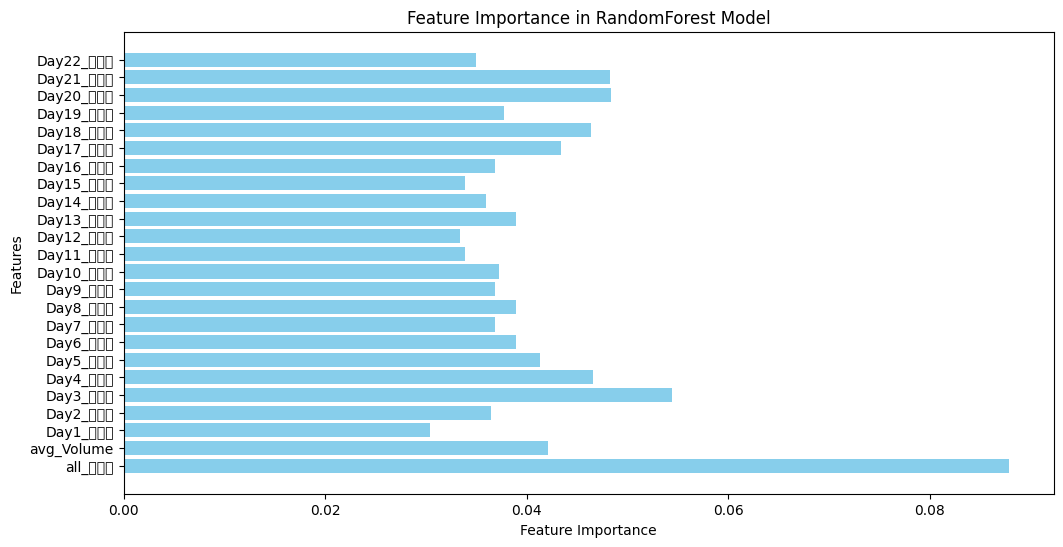

MLflow UI: http://mlflow-tracking:5003


In [4]:
# データ読み込み
df = pd.read_csv('stock-category_all.csv', index_col=0)

# 特徴量 (X) と ターゲット変数 (y) の分割
X = df.drop(columns=["Ticker", "Category"])
y = df["Category"]

# ラベルエンコーディング (Categoryを数値化)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 訓練データとテストデータに分割 (80% 訓練, 20% テスト)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# MLflowの実験を開始
with mlflow.start_run():
    run = mlflow.active_run()  # ✅ ここでアクティブなRunを取得
    # モデルの構築 (ランダムフォレスト分類器)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # ✨ 特徴量スキーマを推定
    signature = infer_signature(X_train, model.predict(X_train))

    # 予測
    y_pred = model.predict(X_test)

    # 精度評価
    accuracy = accuracy_score(y_test, y_pred)
    print(f"モデルの精度: {accuracy:.4f}")
    print("分類レポート:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # モデルをMLflowに保存
    mlflow.log_param("n_estimators", 100)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(
        model, 
        "model", 
        registered_model_name="Stock_Chart_Classification_Model",
        signature=signature  # 🚀 これを追加することでスキーマが保存される！
    )

    # Model Registry に登録
    model_uri = f"runs:/{run.info.run_id}/model"
    mlflow.register_model(model_uri, "Stock_Chart_Classification_Model")

    # 特徴量の重要度を可視化
    importances = model.feature_importances_
    feature_names = X.columns

    plt.figure(figsize=(12, 6))
    plt.barh(feature_names, importances, color="skyblue")
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance in RandomForest Model")
    plt.show()

    # ラベルエンコーダーも保存（デコード時に必要）
    np.save("label_encoder_classes.npy", label_encoder.classes_)
    mlflow.log_artifact("label_encoder_classes.npy")

# モデルのバージョンを確認
print(f"MLflow UI: {MLFLOW_TRACKING_URI}")


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_

モデルの精度: 0.2167
分類レポート:
              precision    recall  f1-score   support

     これから上昇？       0.00      0.00      0.00         1
       しっかり?       0.00      0.00      0.00         6
     そろそろ天井?       0.00      0.00      0.00         1
       まだ上昇?       0.00      0.00      0.00         3
       まだ下落?       0.00      0.00      0.00         0
       もみ合い?       0.00      0.00      0.00         3
      リバウンド?       0.00      0.00      0.00         2
         上昇?       0.00      0.00      0.00         3
     上昇ストップ？       1.00      0.20      0.33         5
       上昇一服?       0.75      1.00      0.86         3
       上昇基調?       0.33      0.33      0.33         3
     下げとまった？       1.00      1.00      1.00         1
       下げ渋る?       0.00      0.00      0.00         5
        下押す?       0.00      0.00      0.00         2
         下落?       0.20      1.00      0.33         1
     下落ストップ？       0.00      0.00      0.00         1
       下落基調?       0.00      0.00      0.00         3
    

/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26119 (\N{CJK UNIFIED IDEOGRAPH-6607}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.11/site-packa

MLflow UI: http://mlflow-tracking:5003


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packag

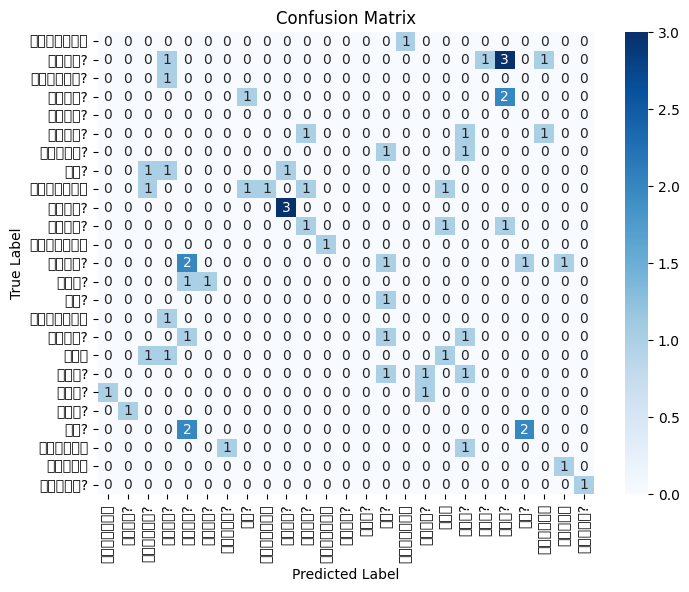

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39472 (\N{CJK UNIFIED IDEOGRAPH-9A30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


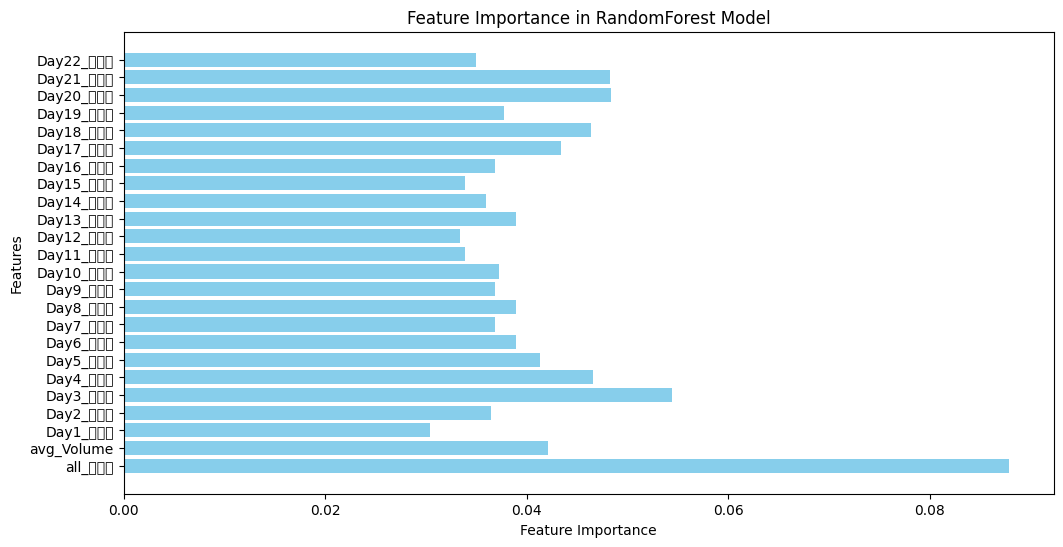

In [5]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlflow.models import infer_signature

# データ読み込み
df = pd.read_csv('stock-category_all.csv', index_col=0)

# 特徴量 (X) と ターゲット変数 (y) の分割
X = df.drop(columns=["Ticker", "Category"])
y = df["Category"]

# ラベルエンコーディング (Categoryを数値化)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 訓練データとテストデータに分割 (80% 訓練, 20% テスト)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# MLflowの実験を開始
with mlflow.start_run():
    run = mlflow.active_run()

    # モデルの構築 (ランダムフォレスト分類器)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # ✨ 特徴量スキーマを推定
    signature = infer_signature(X_train, model.predict(X_train))

    # 予測
    y_pred = model.predict(X_test)

    # 精度評価
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print(f"モデルの精度: {accuracy:.4f}")
    print("分類レポート:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # 🔥 追加: ハイパーパラメータを記録
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)

    # 🔥 追加: 精度指標を記録
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision_macro", report["macro avg"]["precision"])
    mlflow.log_metric("recall_macro", report["macro avg"]["recall"])
    mlflow.log_metric("f1_score_macro", report["macro avg"]["f1-score"])

    # 🔥 追加: 混同行列を記録
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # 🔥 追加: 予測データをサンプルで記録
    sample_predictions = pd.DataFrame({"Actual": label_encoder.inverse_transform(y_test[:10]), "Predicted": label_encoder.inverse_transform(y_pred[:10])})
    sample_predictions.to_csv("sample_predictions.csv", index=False)
    mlflow.log_artifact("sample_predictions.csv")

    # 🔥 追加: 特徴量の重要度を記録
    importances = model.feature_importances_
    feature_names = X.columns
    np.save("feature_importance.npy", importances)
    mlflow.log_artifact("feature_importance.npy")

    # 🔥 追加: 特徴量の重要度をグラフで可視化して記録
    plt.figure(figsize=(12, 6))
    plt.barh(feature_names, importances, color="skyblue")
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance in RandomForest Model")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")

    # モデルをMLflowに保存
    mlflow.sklearn.log_model(
        model, 
        "model", 
        registered_model_name="Stock_Chart_Classification_Model",
        signature=signature
    )

    # Model Registry に登録
    model_uri = f"runs:/{run.info.run_id}/model"
    mlflow.register_model(model_uri, "Stock_Chart_Classification_Model")

    # 🔥 追加: ラベルエンコーダーも保存
    np.save("label_encoder_classes.npy", label_encoder.classes_)
    mlflow.log_artifact("label_encoder_classes.npy")

# モデルのバージョンを確認
print(f"MLflow UI: {mlflow.get_tracking_uri()}")


In [8]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# 登録済みの全モデルを取得
registered_models = client.search_registered_models()

# モデル名のリストを表示
for model in registered_models:
    print(f"モデル名: {model.name}")


モデル名: Stock_Chart_Classification_Model


In [9]:
model_uri

'runs:/31fb1ed410b843c4a41e231e39b27fe4/model'

In [10]:
#サービングされているモデルの確認
import mlflow

# MLflow Tracking Server の URI を設定
mlflow.set_tracking_uri("http://mlflow-tracking:5003")  # 必要に応じて修正

# Model Registry から Production のモデルを取得
model = mlflow.pyfunc.load_model("models:/Stock_Chart_Classification_Model/Production")

# モデルの詳細を確認
print(model)

/opt/conda/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.1/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


mlflow.pyfunc.loaded_model:
  artifact_path: model
  flavor: mlflow.sklearn
  run_id: 33eda2fd643f45aea4338651eb2e3448



In [11]:
import pandas as pd

# 推論データの準備（適切な特徴量を用意）
input_data = pd.DataFrame([[1.0] * 25])  # 適宜変更

# Model Registry から Production のモデルを取得
model = mlflow.pyfunc.load_model("models:/Stock_Chart_Classification_Model/Production")

# 予測実行
predictions = model.predict(input_data)

# 結果を表示
print("Predictions:", predictions)


MlflowException: Model is missing inputs ['all_騰落率', 'avg_Volume', 'Day1_騰落率', 'Day2_騰落率', 'Day3_騰落率', 'Day4_騰落率', 'Day5_騰落率', 'Day6_騰落率', 'Day7_騰落率', 'Day8_騰落率', 'Day9_騰落率', 'Day10_騰落率', 'Day11_騰落率', 'Day12_騰落率', 'Day13_騰落率', 'Day14_騰落率', 'Day15_騰落率', 'Day16_騰落率', 'Day17_騰落率', 'Day18_騰落率', 'Day19_騰落率', 'Day20_騰落率', 'Day21_騰落率', 'Day22_騰落率']. Note that there were extra inputs: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [12]:
import mlflow
client = mlflow.tracking.MlflowClient()
models = client.search_registered_models()
for model in models:
    print(f"Model Name: {model.name}")
    for version in model.latest_versions:
        print(f" - Version: {version.version}, Stage: {version.current_stage}, Path: {version.source}")


Model Name: Stock_Chart_Classification_Model
 - Version: 3, Stage: Archived, Path: /app/mlflow-tracking/artifacts/14/34198611d64c4f9ab3ea6317a0659ffb/artifacts/model
 - Version: 7, Stage: None, Path: /app/mlflow-tracking/artifacts/14/31fb1ed410b843c4a41e231e39b27fe4/artifacts/model
 - Version: 5, Stage: Production, Path: /app/mlflow-tracking/artifacts/14/33eda2fd643f45aea4338651eb2e3448/artifacts/model


In [13]:
import mlflow
from mlflow.tracking import MlflowClient

client = MlflowClient()
model_name = "Stock_Chart_Classification_Model"

# 最新バージョンのモデル情報を取得
latest_version = client.get_latest_versions(model_name, stages=["Production"])
if latest_version:
    print("モデルのパス:", latest_version[0].source)
else:
    print("Production ステージのモデルが見つかりません。")


モデルのパス: /app/mlflow-tracking/artifacts/14/33eda2fd643f45aea4338651eb2e3448/artifacts/model


/tmp/ipykernel_21663/468297779.py:8: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.1/model-registry.html#migrating-from-stages
  latest_version = client.get_latest_versions(model_name, stages=["Production"])


In [14]:
import mlflow.pyfunc

model_uri = "models:/Stock_Chart_Classification_Model/Production"
try:
    model = mlflow.pyfunc.load_model(model_uri)
    print("✅ モデルロード成功")
except Exception as e:
    print("❌ モデルロードエラー:", e)


✅ モデルロード成功


In [15]:
# 数値ラベルと元のカテゴリの対応を表示
category_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("🔄 数値ラベル ⇄ 元のカテゴリ")
for num, label in category_mapping.items():
    print(f"{num} ➝ {label}")

🔄 数値ラベル ⇄ 元のカテゴリ
0 ➝ これから上昇？
1 ➝ しっかり?
2 ➝ そろそろ天井?
3 ➝ まだ上昇?
4 ➝ まだ下落?
5 ➝ もみ合い?
6 ➝ リバウンド?
7 ➝ 上昇?
8 ➝ 上昇ストップ？
9 ➝ 上昇一服?
10 ➝ 上昇基調?
11 ➝ 下げとまった？
12 ➝ 下げ渋る?
13 ➝ 下押す?
14 ➝ 下落?
15 ➝ 下落ストップ？
16 ➝ 下落基調?
17 ➝ 売り？
18 ➝ 弱含み?
19 ➝ 強含み?
20 ➝ 急上昇?
21 ➝ 急落?
22 ➝ 戻ってくる？
23 ➝ 戻らない？
24 ➝ 行って来い?


In [7]:
import mlflow

# MLflow の Tracking URI を設定
mlflow.set_tracking_uri("http://mlflow-tracking:5003")

# モデルのロード
model_uri = "models:/Stock_Chart_Classification_Model/Production"
model = mlflow.pyfunc.load_model(model_uri)

# 学習時の特徴量スキーマを確認
print("学習時の特徴量スキーマ:", model.metadata.get_input_schema())


/opt/conda/lib/python3.11/site-packages/mlflow/store/artifact/utils/models.py:32: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.9.1/model-registry.html#migrating-from-stages
  latest = client.get_latest_versions(name, None if stage is None else [stage])


学習時の特徴量スキーマ: None
